In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 03/02/2020
Initialization for S1PL, Notebook was last run on: 03/02/2020


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance(data_before, data_after, label= '', color='navy', markersize=10):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)
    
    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=markersize, linestyle="", linewidth=0.5, color=color, label=label)
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance', fontsize=26)
    plt.tick_params(labelsize=20)
    plt.ylim(0,1.05)

In [4]:
#file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
#file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/bkg_1TFV/'
file_path = '/dali/lgrandi/ccapelli/haxcache/final_SR1/selections/'
#data = pd.read_pickle(file_path + 'bkg_cutted_SR1_S1PL.pkl')
#data = pd.read_pickle(file_path + 'bkg_cutted_1TFV_SR1_S1PL.pkl')
data = hax.minitrees.load_cache_file(file_path+'bkg_SR1_pax6.10.1_forMichelle.haxcache')
data['CES'] = CES(data, 'cs2_bottom_nn_tf')
data_1 = data[data['s1']<3e4]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/minitrees.py:611: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.cut_history = store.get_storer('data').attrs.cut_history


In [23]:
aftern_NG = data_1[((data_1['run_number']<9860)&(data_1['run_number']>9839))   | \
                   ((data_1['run_number']>9894)&(data_1['run_number']>9868))   | \
                   ((data_1['run_number']>10017)&(data_1['run_number']<10023)) | \
                   ((data_1['run_number']>17580)&(data_1['run_number']<17791))]
                    

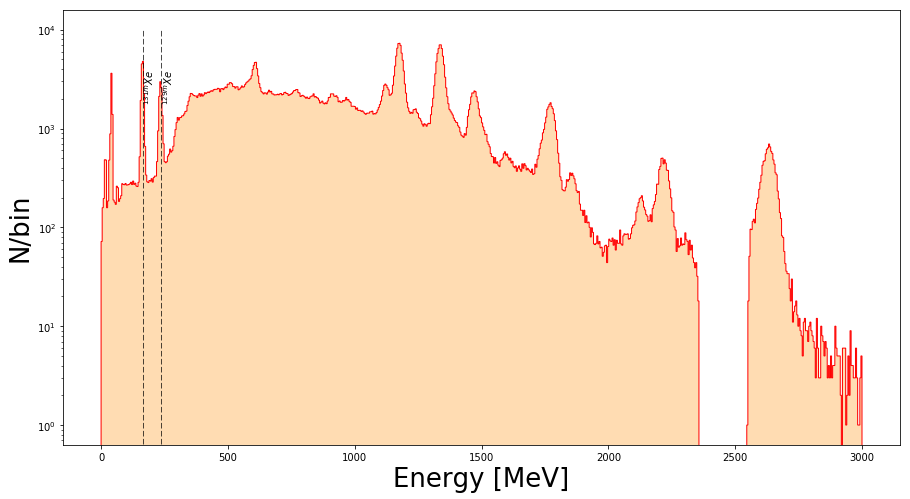

In [26]:
plt.figure(figsize=(15,8))
plt.hist(aftern_NG['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(aftern_NG['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.vlines(x=164, ymin=0, ymax=1e4, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(164, 3e3, '$^{131m}Xe$', rotation=90, size=10)

plt.vlines(x=236, ymin=0, ymax=1e4, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(236, 3e3, '$^{129m}Xe$', rotation=90, size=10)

# Input per S1PL cut

In [5]:
popt_z_high = [2.38811218e+02, 2.55991432e-05, 1.89468970e-01] #exp
popt_z_low = [1.05256551e+02, 7.72450878e-02] #poly1

popt_1 = [1.49406369e+01,  2.62994597e+01, -1.01825116e+00,  1.27941177e-02] #S1PatternLikelihoodProfile_1
popt_2 = [2.18914476e+02, 1.19392164e+02, 5.32460349e-05] #S1arctan

In [6]:
energy_peak = np.array([42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]) #keV
resolution = np.array([0.0516, 0.0260, 0.0223, 0.0137, 0.0117, 0.0109, 0.0103, 0.0091, 0.0092, 0.0081, 0.0081])
sigma_peak = energy_peak*resolution
energy_peak_lower = energy_peak-2*sigma_peak
energy_peak_higher = energy_peak+2*sigma_peak

In [7]:
#83 Kr
gamma42 = data_1[(data_1['CES']/10**3<=energy_peak_higher[0])&(data_1['CES']/10**3>=energy_peak_lower[0])]
cut_gamma42 = (data_1['CES']/10**3<=energy_peak_higher[0])&(data_1['CES']/10**3>=energy_peak_lower[0])
#131m Xe 
gamma164 = data_1[(data_1['CES']/10**3<=energy_peak_higher[1])&(data_1['CES']/10**3>=energy_peak_lower[1])]
cut_gamma164 = (data_1['CES']/10**3<=energy_peak_higher[1])&(data_1['CES']/10**3>=energy_peak_lower[1])
#129m Xe
gamma236 = data_1[(data_1['CES']/10**3<=energy_peak_higher[2])&(data_1['CES']/10**3>=energy_peak_lower[2])]
cut_gamma236 = (data_1['CES']/10**3<=energy_peak_higher[2])&(data_1['CES']/10**3>=energy_peak_lower[2])
#214 Bi
gamma609 = data_1[(data_1['CES']/10**3<=energy_peak_higher[3])&(data_1['CES']/10**3>=energy_peak_lower[3])]
cut_gamma609 = (data_1['CES']/10**3<=energy_peak_higher[3])&(data_1['CES']/10**3>=energy_peak_lower[3])
#214 Bi
gamma1120 = data_1[(data_1['CES']/10**3<=energy_peak_higher[4])&(data_1['CES']/10**3>=energy_peak_lower[4])]
cut_gamma1120 = (data_1['CES']/10**3<=energy_peak_higher[4])&(data_1['CES']/10**3>=energy_peak_lower[4])
#60 Co
gamma1173 = data_1[(data_1['CES']/10**3<=energy_peak_higher[5])&(data_1['CES']/10**3>=energy_peak_lower[5])]
cut_gamma1173 = (data_1['CES']/10**3<=energy_peak_higher[5])&(data_1['CES']/10**3>=energy_peak_lower[5])
#60 Co
gamma1332 = data_1[(data_1['CES']/10**3<=energy_peak_higher[6])&(data_1['CES']/10**3>=energy_peak_lower[6])]
cut_gamma1332 = (data_1['CES']/10**3<=energy_peak_higher[6])&(data_1['CES']/10**3>=energy_peak_lower[6])
#40 K
gamma1461 = data_1[(data_1['CES']/10**3<=energy_peak_higher[7])&(data_1['CES']/10**3>=energy_peak_lower[7])]
cut_gamma1461 = (data_1['CES']/10**3<=energy_peak_higher[7])&(data_1['CES']/10**3>=energy_peak_lower[7])
#214 Bi
gamma1764 = data_1[(data_1['CES']/10**3<=energy_peak_higher[8])&(data_1['CES']/10**3>=energy_peak_lower[8])]
cut_gamma1764 = (data_1['CES']/10**3<=energy_peak_higher[8])&(data_1['CES']/10**3>=energy_peak_lower[8])
#214 Bi 
gamma2204 = data_1[(data_1['CES']/10**3<=energy_peak_higher[9])&(data_1['CES']/10**3>=energy_peak_lower[9])]
cut_gamma2204 = (data_1['CES']/10**3<=energy_peak_higher[9])&(data_1['CES']/10**3>=energy_peak_lower[9])
#208 Tl 
gamma2614 = data_1[(data_1['CES']/10**3<=energy_peak_higher[10])&(data_1['CES']/10**3>=energy_peak_lower[10])]
cut_gamma2614 = (data_1['CES']/10**3<=energy_peak_higher[10])&(data_1['CES']/10**3>=energy_peak_lower[10])

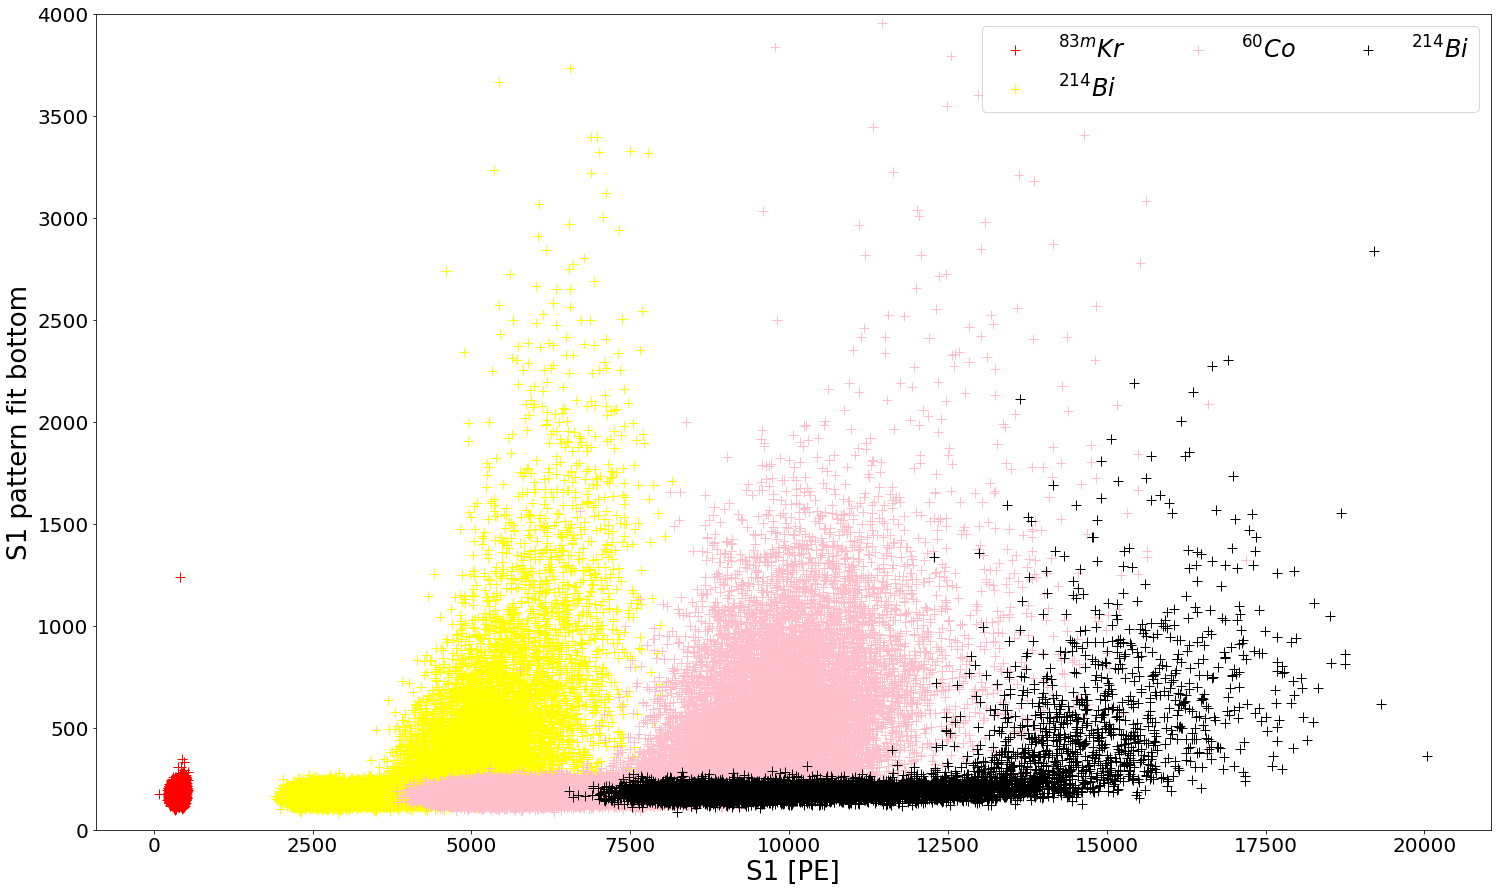

In [8]:
plt.figure(figsize=(25,15))

plt.plot(gamma42['s1'], gamma42['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='$^{83m}Kr$')
#plt.plot(gamma164['s1'], gamma164['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='blue', label='$^{131m}Xe$')
#plt.plot(gamma236['s1'], gamma236['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='green', label='$^{129m}Xe$')
plt.plot(gamma609['s1'], gamma609['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='$^{214}Bi$')
#plt.plot(gamma1120['s1'], gamma1120['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='orange', label='$^{214}Bi$')
#plt.plot(gamma1173['s1'], gamma1173['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1332['s1'], gamma1332['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='pink', label='$^{60}Co$')
#plt.plot(gamma1461['s1'], gamma1461['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='purple', label='$^{40}K$')
#plt.plot(gamma1764['s1'], gamma1764['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='maroon', label='$^{214}Bi$')
plt.plot(gamma2204['s1'], gamma2204['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='black', label='$^{214}Bi$')
#plt.plot(gamma2614['s1'], gamma2614['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='grey', label='$^{208}Tl$')

plt.legend(loc=0, ncol=3, fontsize = 24)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.ylim(bottom= 0, top=4000)

# gamma42, gamma164, gamma236, gamma609, gamma1120, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614
data_gamma = pd.concat([gamma42, gamma164, gamma236, gamma609, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614])

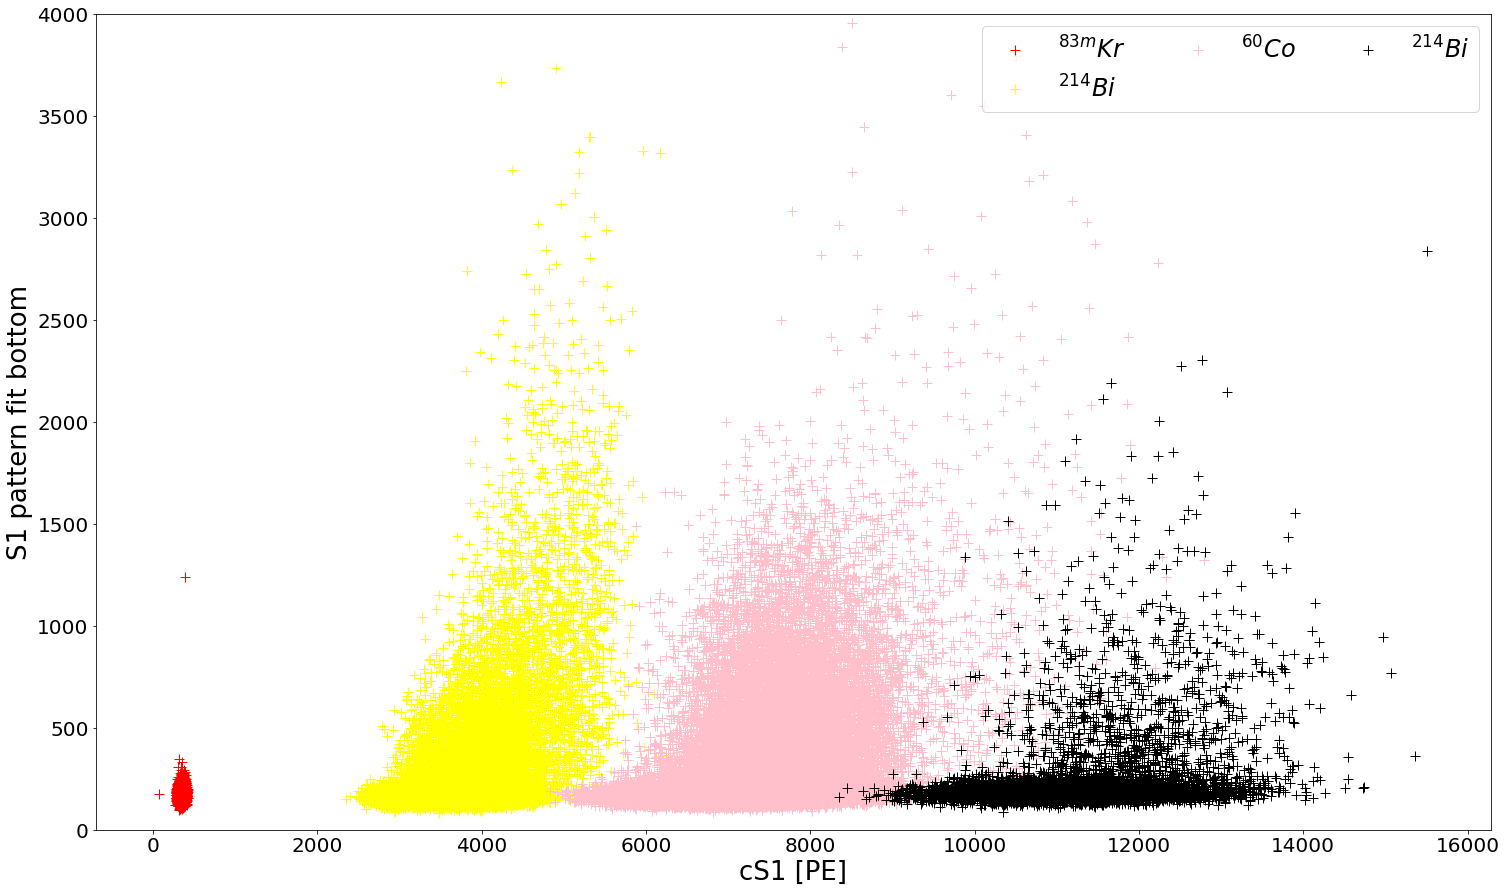

In [9]:
plt.figure(figsize=(25,15))

plt.plot(gamma42['cs1_nn_tf'], gamma42['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='$^{83m}Kr$')
#plt.plot(gamma164['cs1_nn_tf'], gamma164['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='blue', label='$^{131m}Xe$')
#plt.plot(gamma236['cs1_nn_tf'], gamma236['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='green', label='$^{129m}Xe$')
plt.plot(gamma609['cs1_nn_tf'], gamma609['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='$^{214}Bi$')
#plt.plot(gamma1120['cs1_nn_tf'], gamma1120['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='orange', label='$^{214}Bi$')
#plt.plot(gamma1173['cs1_nn_tf'], gamma1173['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1332['cs1_nn_tf'], gamma1332['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='pink', label='$^{60}Co$')
#plt.plot(gamma1461['cs1_nn_tf'], gamma1461['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='purple', label='$^{40}K$')
#plt.plot(gamma1764['cs1_nn_tf'], gamma1764['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='maroon', label='$^{214}Bi$')
plt.plot(gamma2204['cs1_nn_tf'], gamma2204['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='black', label='$^{214}Bi$')
#plt.plot(gamma2614['cs1_nn_tf'], gamma2614['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='grey', label='$^{208}Tl$')

plt.legend(loc=0, ncol=3, fontsize = 24)
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.ylim(bottom= 0, top=4000)

# gamma42, gamma164, gamma236, gamma609, gamma1120, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614
data_gamma = pd.concat([gamma42, gamma164, gamma236, gamma609, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614])

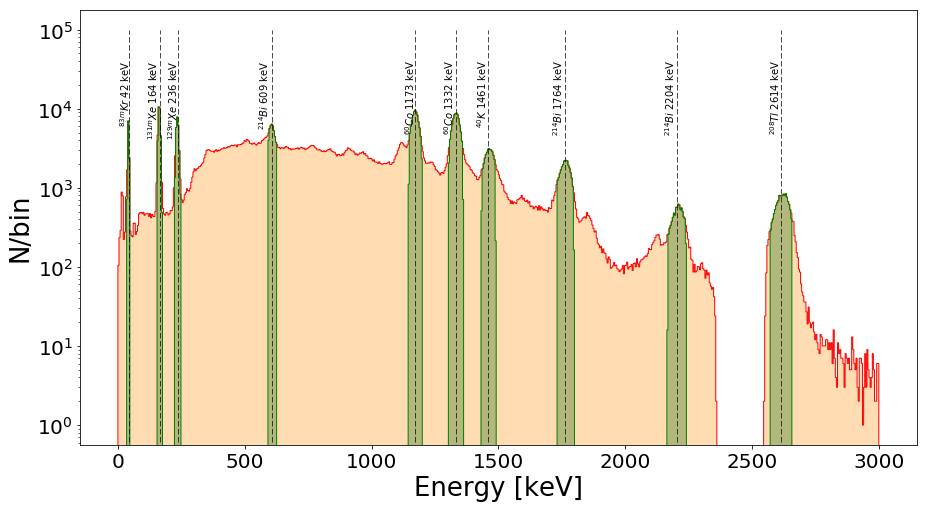

In [10]:
plt.figure(figsize=(15,8))
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.hist(data_gamma['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkgreen',
         alpha = 0.3)
plt.hist(data_gamma['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [keV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.vlines(x=42, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(0, 3e4, '$^{83m}Kr$ 42 keV', rotation=90, size=10)

plt.vlines(x=164, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(110, 3e4, '$^{131m}Xe$ 164 keV', rotation=90, size=10)

plt.vlines(x=236, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(190, 3e4, '$^{129m}Xe$ 236 keV', rotation=90, size=10)

plt.vlines(x=609, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(550, 3e4, '$^{214}Bi$ 609 keV', rotation=90, size=10)

#plt.vlines(x=1120, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
#plt.text(1070, 3e4, '$^{214}Bi$ 1120 keV', rotation=90, size=10)

plt.vlines(x=1173, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1125, 3e4, '$^{60}Co$ 1173 keV', rotation=90, size=10)

plt.vlines(x=1332, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1280, 3e4, '$^{60}Co$ 1332 keV', rotation=90, size=10)

plt.vlines(x=1461, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1410, 3e4, '$^{40}K$ 1461 keV', rotation=90, size=10)

plt.vlines(x=1764, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1710, 3e4, '$^{214}Bi$ 1764 keV', rotation=90, size=10)

plt.vlines(x=2204, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2150, 3e4, '$^{214}Bi$ 2204 keV', rotation=90, size=10)

#plt.vlines(x=2448, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
#plt.text(2456, 3e4, '$^{214}Bi$ 2448 keV', rotation=90, size=10)

plt.vlines(x=2614, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2565, 3e4, '$^{208}Tl$ 2614 keV', rotation=90, size=10)

plt.tick_params(labelsize=20)

#### Applichiamo il taglio ad ogni photo-peak e vediamo come sono distribuiti

In [11]:
import lax
from lax.lichens import postsr1
CutS1PL_HE = postsr1.S1PatternLikelihood_HE()

In [12]:
data = CutS1PL_HE.process(data_1)
print('\TOT: ')
data_GOOD = hax.cuts.selection(data, data['CutS1PatternLikelihood_HE'] == True)
data_BAD = hax.cuts.selection(data, data['CutS1PatternLikelihood_HE'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


\TOT: 
Unnamed selection: 220411 rows removed (80.02% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 882960 rows removed (19.98% passed)


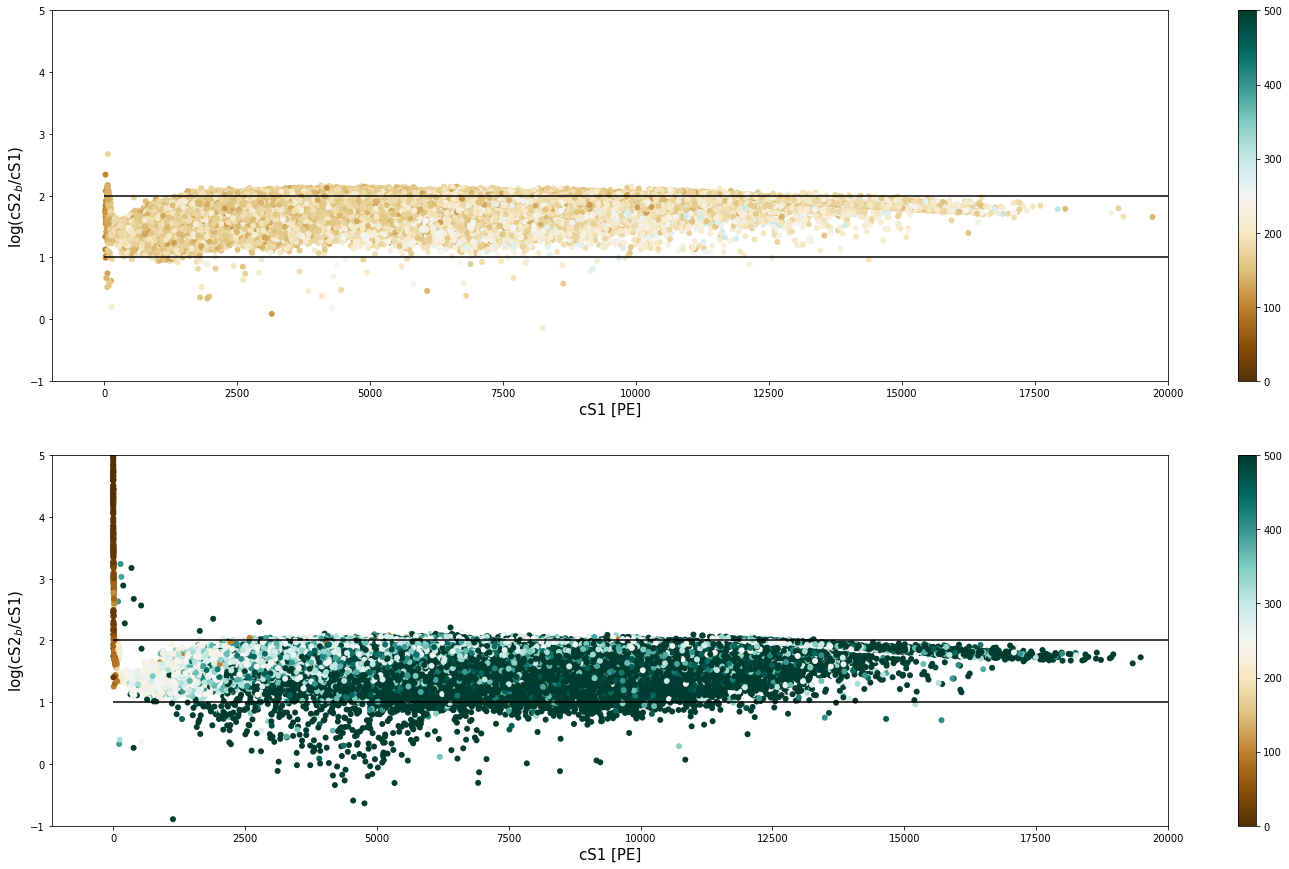

In [14]:
fig = plt.figure(figsize=(25,15))

plt.subplot(211)
points_GOOD = plt.scatter(data_GOOD['cs1_nn_tf'], np.log10(data_GOOD['cs2_bottom_nn_tf']/data_GOOD['cs1_nn_tf']), 
                     c=data_GOOD['s1_pattern_fit_bottom_hax'], cmap="BrBG", lw=0, vmin=0, vmax=500)
plt.colorbar(points_GOOD)
plt.xlabel('cS1 [PE]', fontsize=15)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=15)
plt.tick_params(labelsize=10)
plt.ylim(-1,5)
plt.xlim(right=2e4)
plt.hlines(y=1, xmin=0, xmax=2e4, colors='k', linestyles='solid')
plt.hlines(y=2, xmin=0, xmax=2e4, colors='k', linestyles='solid')


plt.subplot(212)
points_BAD = plt.scatter(data_BAD['cs1_nn_tf'], np.log10(data_BAD['cs2_bottom_nn_tf']/data_BAD['cs1_nn_tf']), 
                     c=data_BAD['s1_pattern_fit_bottom_hax'], cmap="BrBG", lw=0, vmin=0, vmax=500)
plt.colorbar(points_BAD)
plt.xlabel('cS1 [PE]', fontsize=15)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=15)
plt.tick_params(labelsize=10)
plt.ylim(-1,5)
plt.xlim(right=2e4)
plt.hlines(y=1, xmin=0, xmax=2e4, colors='k', linestyles='solid')
plt.hlines(y=2, xmin=0, xmax=2e4, colors='k', linestyles='solid')

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


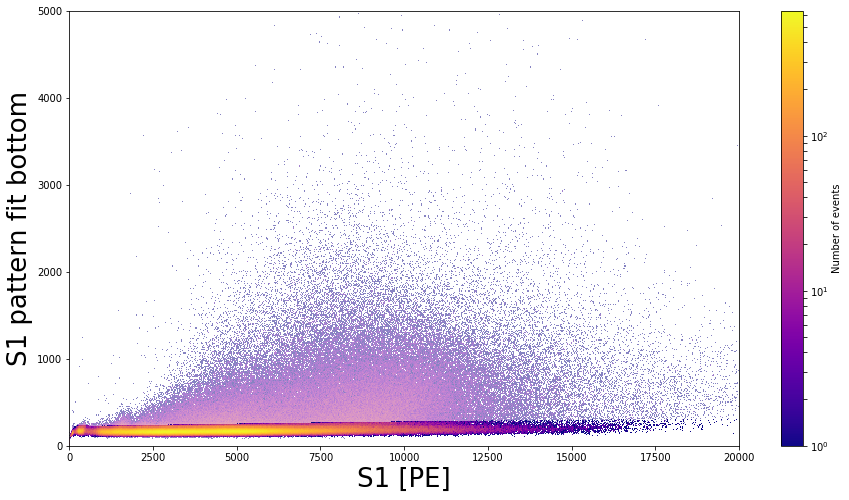

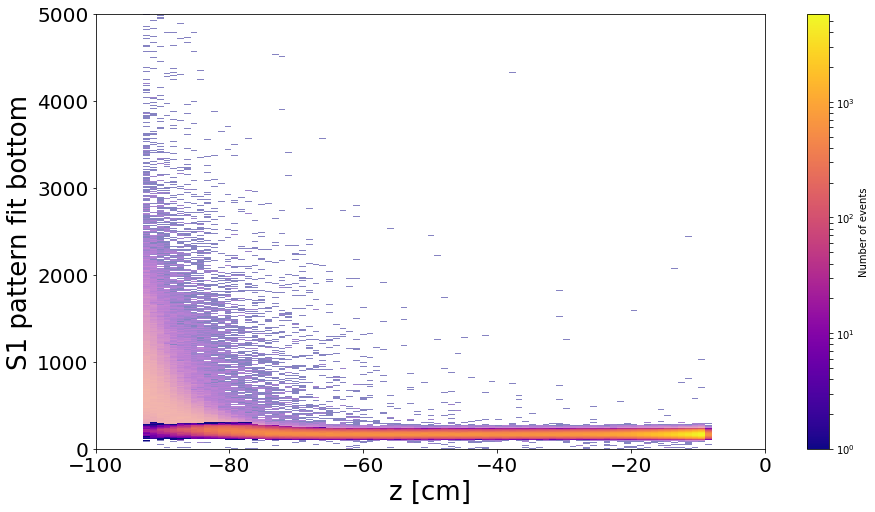

In [13]:
plt.figure(figsize=(15,8))

plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], bins = (1000, 400), 
           range=((0,2e4), (0, 5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['s1'], data_GOOD['s1_pattern_fit_bottom_hax'], bins = (1000, 400), 
           range=((0,2e4), (0, 5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

xbins = np.linspace(-100, 0, 100)
ybins = np.linspace(0, 5e3, 1000)

plt.figure(figsize=(15,8))
plt.hist2d(data_1['z_3d_nn_tf'], data_1['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['z_3d_nn_tf'], data_GOOD['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


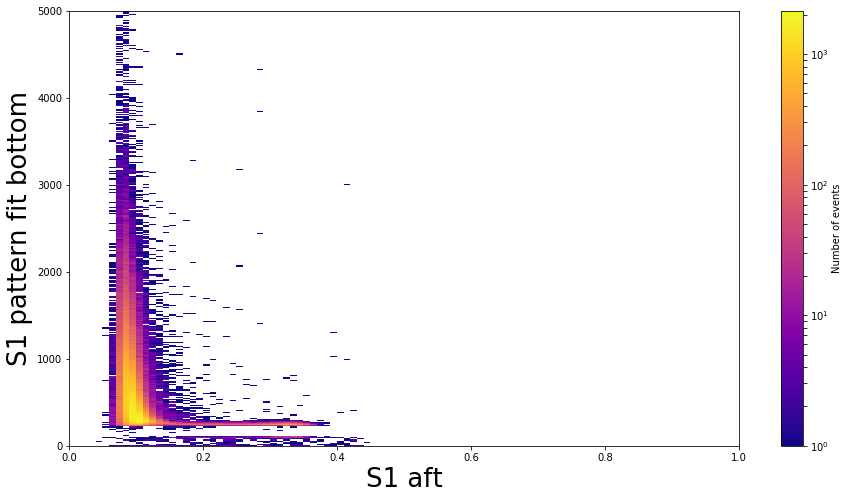

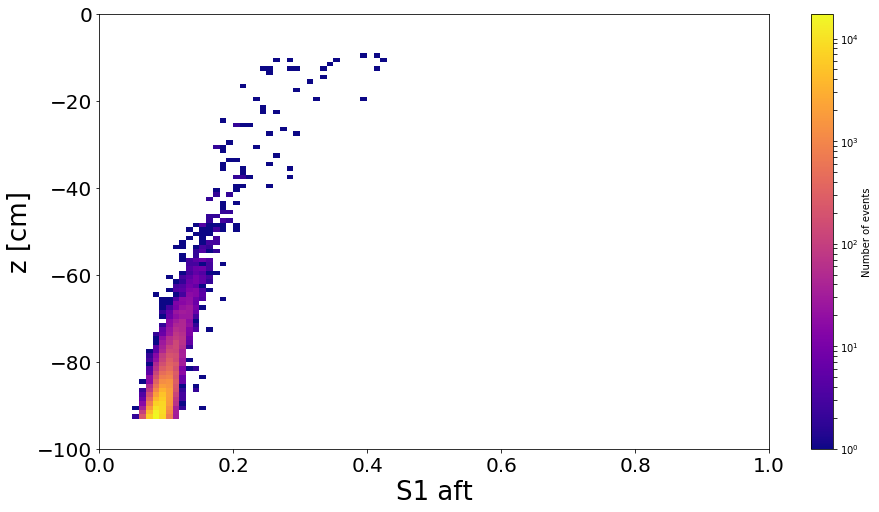

In [25]:
plt.figure(figsize=(15,8))

#plt.hist2d(data_1['s1_area_fraction_top'], data_1['s1_pattern_fit_bottom_hax'], bins = (100, 400), 
#           range=((0,1), (0, 5e3)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
#           cmin = 1,alpha = 0.5)
plt.hist2d(data_BAD['s1_area_fraction_top'], data_BAD['s1_pattern_fit_bottom_hax'], 
           bins = (100, 400), 
           range=((0,1), (0, 5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 aft', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

tmp = data_BAD[data_BAD['s1_pattern_fit_bottom_hax']>400]

plt.figure(figsize=(15,8))
#plt.hist2d(data_1['s1_area_fraction_top'], data_1['z_3d_nn_tf'],
#           bins = (100, 100), 
#           range=((0, 1), (-100,0)),  
#           cmap=plt.cm.plasma, 
#           norm=matplotlib.colors.LogNorm(),
#           cmin = 1,alpha = 0.5)
plt.hist2d(tmp['s1_area_fraction_top'], tmp['z_3d_nn_tf'], 
           bins = (100, 100), 
           range=((0, 1), (-100,0)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 aft', fontsize=26)
plt.ylabel('z [cm]', fontsize=26)
plt.tick_params(labelsize=20)

In [16]:
for i in data.columns:
    print(i)

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


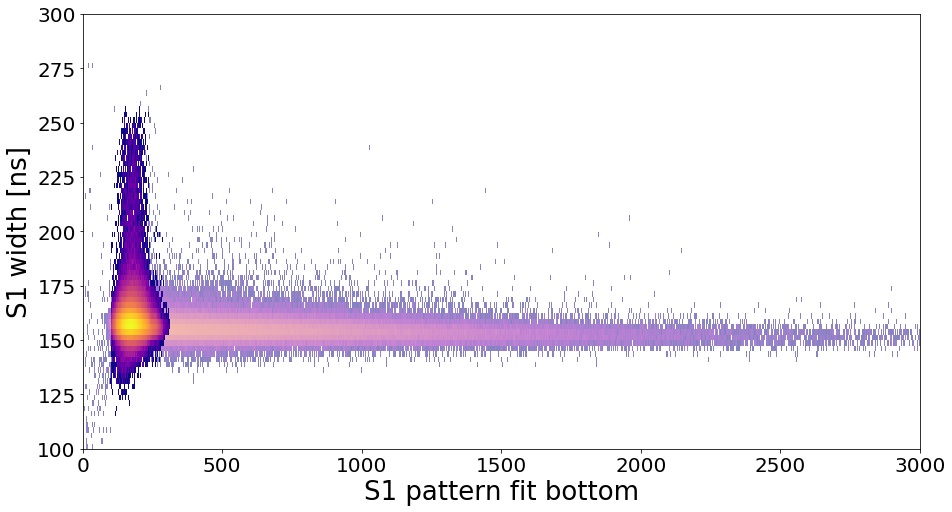

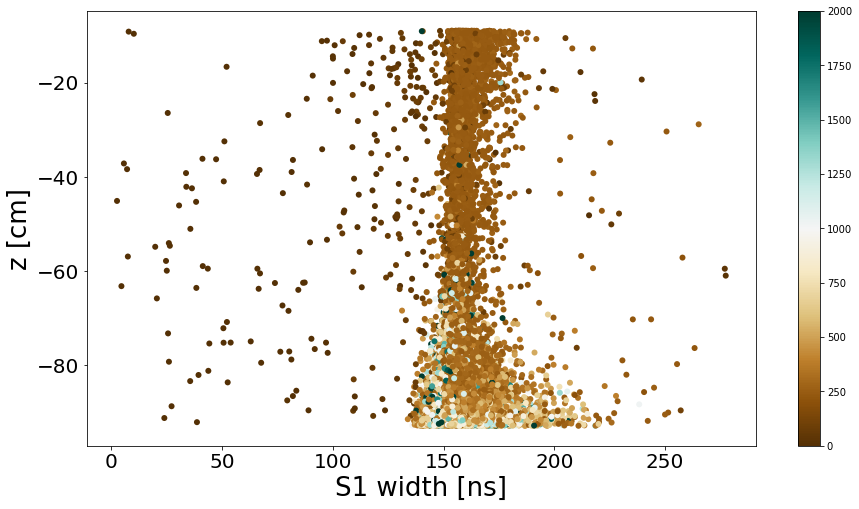

In [24]:
tmp = data[data['CES']>0]
tmp_GOOD = data_GOOD[data_GOOD['CES']>0]
tmp_BAD = data_BAD[data_BAD['CES']>0]

plt.figure(figsize=(15,8))
plt.hist2d(tmp['s1_pattern_fit_bottom_hax'], tmp['s1_range_80p_area'], 
           bins = (1000, 80), 
           range=((0, 3e3), (100, 300)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
#plt.colorbar(label='Number of events')
plt.hist2d(tmp_GOOD['s1_pattern_fit_bottom_hax'], tmp_GOOD['s1_range_80p_area'], 
           bins = (1000, 80), 
           range=((0, 3e3), (100, 300)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.colorbar(label='Number of events')
plt.xlabel('S1 pattern fit bottom', fontsize=26)
plt.ylabel('S1 width [ns]', fontsize=26)
plt.tick_params(labelsize=20)

#xbins = np.linspace(-100, 0, 100)
#ybins = np.linspace(0, 5e3, 100)

plt.figure(figsize=(15,8))
'''plt.hist2d(tmp['s1_range_80p_area'], tmp['z_3d_nn_tf'], 
           bins = (100, 100), 
           range=((0, 300), (-100, 0)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.colorbar(label='Number of events')
plt.hist2d(tmp_GOOD['s1_range_80p_area'], tmp_GOOD['z_3d_nn_tf'],
           bins = (100, 100), 
           range=((0, 300), (-100, 0)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)'''

points_BAD = plt.scatter(tmp_BAD['s1_range_80p_area'], tmp_BAD['z_3d_nn_tf'], 
                     c=tmp_BAD['s1_pattern_fit_bottom_hax'], cmap="BrBG", lw=0, vmin=0, vmax=2000)
plt.colorbar(points_BAD)
plt.xlabel('S1 width [ns]', fontsize=26)
plt.ylabel('z [cm]', fontsize=26)
plt.tick_params(labelsize=20)

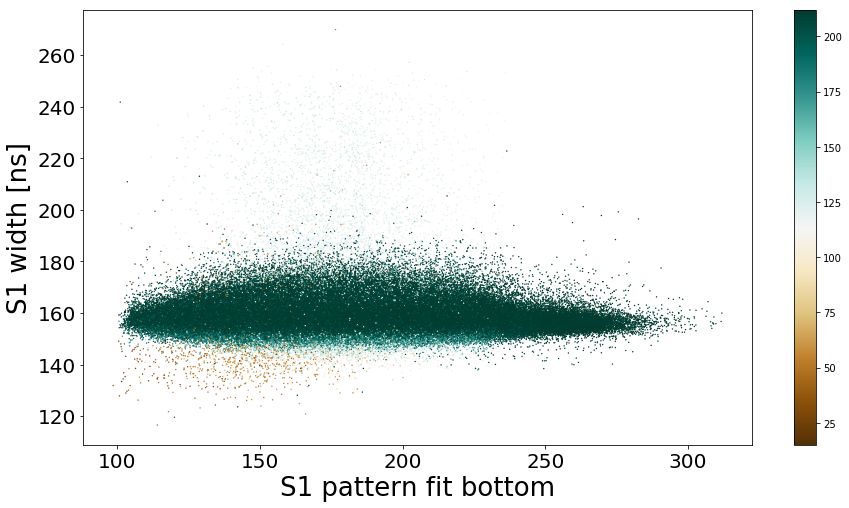

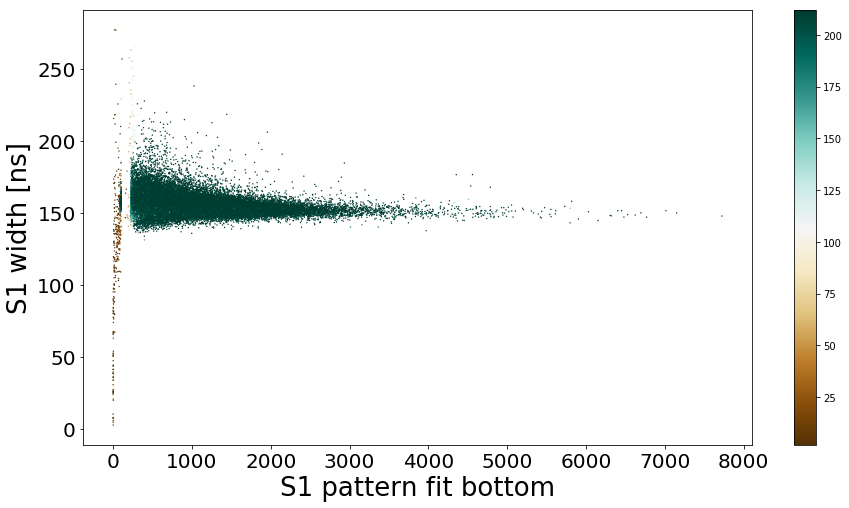

In [31]:
plt.figure(figsize=(15,8))

points_GOOD = plt.scatter(tmp_GOOD['s1_pattern_fit_bottom_hax'], tmp_GOOD['s1_range_80p_area'], 
                         c=tmp_GOOD['s1_n_contributing_channels'], s=3, cmap="BrBG", lw=0)# vmin=0, vmax=2000)
plt.colorbar(points_GOOD)
plt.ylabel('S1 width [ns]', fontsize=26)
plt.xlabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.figure(figsize=(15,8))

points_BAD = plt.scatter(tmp_BAD['s1_pattern_fit_bottom_hax'], tmp_BAD['s1_range_80p_area'], 
                         c=tmp_BAD['s1_n_contributing_channels'], s=3, cmap="BrBG", lw=0)# vmin=0, vmax=2000)
plt.colorbar(points_BAD)
plt.ylabel('S1 width [ns]', fontsize=26)
plt.xlabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
data_150 = data[data['z_3d_nn_tf']<-75]
data_GOOD_150 = data_GOOD[data_GOOD['z_3d_nn_tf']<-75]
data_BAD_150 = data_BAD[data_BAD['z_3d_nn_tf']<-75]

plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_150.s1_pattern_fit_bottom_hax, data_150.s1_n_contributing_channels, bins = (500, 250), 
           range=((0,5e3), (0,250)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD_150.s1_pattern_fit_bottom_hax, data_GOOD_150.s1_n_contributing_channels, bins = (500, 250), 
           range=((0,5e3), (0,250)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('drift_time', fontsize=26)
plt.ylabel('s2_range_50p_area', fontsize=26)
plt.tick_params(labelsize=20)

xbins = np.linspace(-100, 0, 100)
ybins = np.linspace(0, 5e3, 1000)

plt.subplot(122)
plt.hist2d(data_150['z_3d_nn_tf'], data_150['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD_150['z_3d_nn_tf'], data_GOOD_150['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
fig = plt.figure(figsize=(20,8))

plt.subplot(131)
points_GOOD = plt.scatter(data_GOOD.s1_pattern_fit_bottom_hax, data_GOOD.s1_n_contributing_channels, 
                          c=data_GOOD['z_3d_nn_tf'], cmap="RdGy", lw=0)
plt.colorbar(points_GOOD)
plt.xlabel('s1_pattern_fit_bottom_hax', fontsize=15)
plt.ylabel('s1_n_contributing_channels', fontsize=15)
plt.tick_params(labelsize=10)

plt.subplot(132)
points_BAD = plt.scatter(data_BAD.s1_pattern_fit_bottom_hax, data_BAD.s1_n_contributing_channels, 
                          c=data_BAD['z_3d_nn_tf'], cmap="BuPu", lw=0)
plt.colorbar(points_BAD)
plt.xlabel('s1_pattern_fit_bottom_hax', fontsize=15)
plt.ylabel('s1_n_contributing_channels', fontsize=15)
plt.tick_params(labelsize=10)

plt.subplot(133)
points_BAD_E = plt.scatter(data_BAD.s1_pattern_fit_bottom_hax, data_BAD.s1_n_contributing_channels, 
                          c=data_BAD['CES']/1e3, cmap="BuPu", lw=0)
plt.colorbar(points_BAD_E)
plt.xlabel('s1_pattern_fit_bottom_hax', fontsize=15)
plt.ylabel('s1_n_contributing_channels', fontsize=15)
plt.tick_params(labelsize=10)

In [ ]:
###########################################################
## gamma42, gamma164, gamma236, gamma609, gamma1173, 
## gamma1332, gamma1461, gamma1764, gamma2204, gamma2614
###########################################################

gamma42 = CutS1PL_HE.process(gamma42)
gamma164 = CutS1PL_HE.process(gamma164)
gamma236 = CutS1PL_HE.process(gamma236)
gamma609 = CutS1PL_HE.process(gamma609)
gamma1173 = CutS1PL_HE.process(gamma1173)
gamma1332 = CutS1PL_HE.process(gamma1332)
gamma1461 = CutS1PL_HE.process(gamma1461)
gamma1764 = CutS1PL_HE.process(gamma1764)
gamma2204 = CutS1PL_HE.process(gamma2204)
gamma2614 = CutS1PL_HE.process(gamma2614)

print('\nGamma42: ')
gamma42_GOOD = hax.cuts.selection(gamma42, gamma42['CutS1PatternLikelihood_HE'] == True)
gamma42_BAD = hax.cuts.selection(gamma42, gamma42['CutS1PatternLikelihood_HE'] == False)
print('\nGamma164: ')
gamma164_GOOD = hax.cuts.selection(gamma164, gamma164['CutS1PatternLikelihood_HE'] == True)
gamma164_BAD = hax.cuts.selection(gamma164, gamma164['CutS1PatternLikelihood_HE'] == False)
print('\nGamma236: ')
gamma236_GOOD = hax.cuts.selection(gamma236, gamma236['CutS1PatternLikelihood_HE'] == True)
gamma236_BAD = hax.cuts.selection(gamma236, gamma236['CutS1PatternLikelihood_HE'] == False)
print('\nGamma609: ')
gamma609_GOOD = hax.cuts.selection(gamma609, gamma609['CutS1PatternLikelihood_HE'] == True)
gamma609_BAD = hax.cuts.selection(gamma609, gamma609['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1173: ')
gamma1173_GOOD = hax.cuts.selection(gamma1173, gamma1173['CutS1PatternLikelihood_HE'] == True)
gamma1173_BAD = hax.cuts.selection(gamma1173, gamma1173['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1332: ')
gamma1332_GOOD = hax.cuts.selection(gamma1332, gamma1332['CutS1PatternLikelihood_HE'] == True)
gamma1332_BAD = hax.cuts.selection(gamma1332, gamma1332['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1461: ')
gamma1461_GOOD = hax.cuts.selection(gamma1461, gamma1461['CutS1PatternLikelihood_HE'] == True)
gamma1461_BAD = hax.cuts.selection(gamma1461, gamma1461['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1764: ')
gamma1764_GOOD = hax.cuts.selection(gamma1764, gamma1764['CutS1PatternLikelihood_HE'] == True)
gamma1764_BAD = hax.cuts.selection(gamma1764, gamma1764['CutS1PatternLikelihood_HE'] == False)
print('\nGamma2204: ')
gamma2204_GOOD = hax.cuts.selection(gamma2204, gamma2204['CutS1PatternLikelihood_HE'] == True)
gamma2204_BAD = hax.cuts.selection(gamma2204, gamma2204['CutS1PatternLikelihood_HE'] == False)
print('\nGamma2614: ')
gamma2614_GOOD = hax.cuts.selection(gamma2614, gamma2614['CutS1PatternLikelihood_HE'] == True)
gamma2614_BAD = hax.cuts.selection(gamma2614, gamma2614['CutS1PatternLikelihood_HE'] == False)

### Gamma 42

In [ ]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma42['x_3d_nn_tf'], gamma42['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='red', label='$^{83m}Kr$')
plt.plot(gamma42_BAD['x_3d_nn_tf'], gamma42_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma42['r_3d_nn_tf']**2, gamma42['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='red', label='$^{83}Kr$')
plt.plot(gamma42_BAD['r_3d_nn_tf']**2, gamma42_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(0, 2500, 100)
y = np.linspace(0, 500, 100)
plt.hist2d(gamma42['s1'], gamma42['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma42_GOOD['s1'], gamma42_GOOD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 1000, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma42['z_3d_nn_tf'], 
           gamma42['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(gamma42_GOOD['z_3d_nn_tf'], 
           gamma42_GOOD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(0, 2500, 100)
y = np.linspace(0, 500, 100)
plt.hist2d(gamma42_BAD['s1'], gamma42_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 1000, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma42_BAD['z_3d_nn_tf'], 
           gamma42_BAD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)


In [ ]:
for i in gamma42.columns:
    print(i)

In [ ]:
#plt.figure(figsize=(20,6))

################################################
#plt.subplot(121)
#x = np.linspace(200, 700, 100)
#y = np.linspace(0, 500, 100)
#plt.hist2d(gamma42_BAD['s1'], gamma42_BAD['s1_pattern_fit_bottom_hax'], 
#           bins = [x,y], 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
#           cmin = 1,alpha = 1)
#cut_S1 = []
#for i in range(len(x)):
#    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
#plt.plot(x, cut_S1, 'r--')
#plt.xlabel('S1 [PE]', fontsize=26)
#plt.ylabel('S1 pattern fit bottom', fontsize=26)
#plt.tick_params(labelsize=20)
################################################

################################################
#plt.subplot(122)
#x = np.linspace(200, 700, 100)
#y = np.linspace(0, 500, 100)
#plt.hist2d(gamma42_BAD['cs1_nn_tf'], gamma42_BAD['s1_pattern_fit_bottom_hax'], 
#           bins = [x,y], 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
#           cmin = 1,alpha = 1)
#cut_S1 = []
#for i in range(len(x)):
#    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
#plt.plot(x, cut_S1, 'r--')
#plt.xlabel('cS1 [PE]', fontsize=26)
#plt.ylabel('S1 pattern fit bottom', fontsize=26)
#plt.tick_params(labelsize=20)

################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(-97, 0, 100)
y = np.linspace(0, 2000, 100)

plt.hist2d(gamma42_GOOD['z_3d_nn_tf'], gamma42_GOOD['s2_pattern_fit_tpf'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('s2_pattern_fit_tpf [PE]', fontsize=26)
plt.tick_params(labelsize=20)

################################################

################################################
plt.subplot(122)

x = np.linspace(-97, 0, 100)
y = np.linspace(0, 2000, 100)

plt.hist2d(gamma42_BAD['z_3d_nn_tf'], gamma42_BAD['s2_pattern_fit_tpf'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)

plt.colorbar(label='Number of events')

plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('s2_pattern_fit_tpf [PE]', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
fig = plt.figure(figsize=(20,8))
points_GOOD = plt.scatter(gamma164_GOOD['s1_lce_xyz_tf'], gamma164_GOOD['s1_pattern_fit_bottom_hax'], 
                     c=gamma164_GOOD['z_3d_nn_tf'],cmap="RdGy", lw=0)
plt.colorbar(points_GOOD)
points_BAD = plt.scatter(gamma164_BAD['s1_lce_xyz_tf'], gamma164_BAD['s1_pattern_fit_bottom_hax'], 
                     c=gamma164_BAD['z_3d_nn_tf'],cmap="BuPu", lw=0)
plt.colorbar(points_BAD)
plt.xlabel('s1_lce_xyz_tf', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(200, 700, 100)
y = np.linspace(0, 500, 100)
plt.hist2d(gamma42['s1'], gamma42['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma42_BAD['s1'], gamma42_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

x = np.linspace(200, 700, 100)
y = np.linspace(0, 500, 100)
plt.hist2d(gamma42['cs1_nn_tf'], gamma42['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma42_BAD['cs1_nn_tf'], gamma42_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(200, 700, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma42['s1'], gamma42['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma42_BAD['s1'], gamma42_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)

################################################

################################################
plt.subplot(122)

x = np.linspace(200, 700, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma42['cs1_nn_tf'], gamma42['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma42_BAD['cs1_nn_tf'], gamma42_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('cS1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)


### Gamma 164

### gamma 609

In [ ]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma609['x_3d_nn_tf'], gamma609['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='yellow', label='$^{214}Bi$')
plt.plot(gamma609_BAD['x_3d_nn_tf'], gamma609_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)

plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma609['r_3d_nn_tf']**2, gamma609['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='yellow', label='$^{214}Bi$')
plt.plot(gamma609_BAD['r_3d_nn_tf']**2, gamma609_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(1500, 8500, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma609['s1'], gamma609['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma609_GOOD['s1'], gamma609_GOOD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma609['z_3d_nn_tf'], 
           gamma609['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(gamma609_GOOD['z_3d_nn_tf'], 
           gamma609_GOOD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(1500, 8500, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma609_BAD['s1'], gamma609_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma609_BAD['z_3d_nn_tf'], 
           gamma609_BAD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(1500, 8500, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma609['cs1_nn_tf'], gamma609['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma609_GOOD['cs1_nn_tf'], gamma609_GOOD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma609['z_3d_nn_tf'], 
           gamma609['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(gamma609_GOOD['z_3d_nn_tf'], 
           gamma609_GOOD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(1500, 8500, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma609_BAD['s1'], gamma609_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)
x = np.linspace(1500, 8500, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma609_BAD['cs1_nn_tf'], gamma609_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(1500, 8500, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma609_BAD['s1'], gamma609_BAD['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

x = np.linspace(1500, 8500, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma609_BAD['cs1_nn_tf'], gamma609_BAD['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('cS1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(1500, 8500, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma609['s1'], gamma609['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma609_BAD['s1'], gamma609_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

x = np.linspace(1500, 8500, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma609['cs1_nn_tf'], gamma609['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma609_BAD['cs1_nn_tf'], gamma609_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(1500, 8500, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma609['s1'], gamma609['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma609_BAD['s1'], gamma609_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)

################################################

################################################
plt.subplot(122)

x = np.linspace(1500, 8500, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma609['cs1_nn_tf'], gamma609['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma609_BAD['cs1_nn_tf'], gamma609_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('cS1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)


#### gamma 1173

In [ ]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma1173['x_3d_nn_tf'], gamma1173['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1173_BAD['x_3d_nn_tf'], gamma1173_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma1173['r_3d_nn_tf']**2, gamma1173['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1173_BAD['r_3d_nn_tf']**2, gamma1173_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(3000, 13000, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1173['s1'], gamma1173['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1173_GOOD['s1'], gamma1173_GOOD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma1173['z_3d_nn_tf'], 
           gamma1173['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(gamma1173_GOOD['z_3d_nn_tf'], 
           gamma1173_GOOD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(3000, 13000, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1173_BAD['s1'], gamma1173_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma1173_BAD['z_3d_nn_tf'], 
           gamma1173_BAD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(3000, 13000, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1173['cs1_nn_tf'], gamma1173['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1173_GOOD['cs1_nn_tf'], gamma1173_GOOD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

plt.hist2d(gamma1173['z_3d_nn_tf'], 
           gamma1173['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(gamma1173_GOOD['z_3d_nn_tf'], 
           gamma1173_GOOD['s1_pattern_fit_bottom_hax'],
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(3000, 13000, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1173_BAD['s1'], gamma1173_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)
x = np.linspace(3000, 13000, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1173_BAD['cs1_nn_tf'], gamma1173_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(3000, 13000, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma1173_BAD['s1'], gamma1173_BAD['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)

################################################

################################################
plt.subplot(122)

x = np.linspace(3000, 13000, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma1173_BAD['cs1_nn_tf'], gamma1173_BAD['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('cS1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(3000, 13000, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1173['s1'], gamma1173['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1173_BAD['s1'], gamma1173_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

x = np.linspace(3000, 13000, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1173['cs1_nn_tf'], gamma1173['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1173_BAD['cs1_nn_tf'], gamma1173_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(3000, 13000, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma1173['s1'], gamma1173['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1173_BAD['s1'], gamma1173_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)

################################################

################################################
plt.subplot(122)

x = np.linspace(3000, 13000, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma1173['cs1_nn_tf'], gamma1173['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1173_BAD['cs1_nn_tf'], gamma1173_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('cS1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)


#### gamma 1332

In [ ]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma1332['x_3d_nn_tf'], gamma1332['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['x_3d_nn_tf'], gamma1332_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma1332['r_3d_nn_tf']**2, gamma1332['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['r_3d_nn_tf']**2, gamma1332_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma1332['cs1_nn_tf'], np.log10(gamma1332['cs2_bottom_nn_tf']/gamma1332['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['cs1_nn_tf'], np.log10(gamma1332_BAD['cs2_bottom_nn_tf']/gamma1332_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma1332_GOOD['x_3d_nn_tf'], gamma1332_GOOD['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma1332_GOOD['r_3d_nn_tf']**2, gamma1332_GOOD['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(3000, 13100, 100)
y = np.linspace(0, 3500, 100)
hist, xbins, ybins, _ = plt.hist2d(gamma1332['s1'], gamma1332['s1_pattern_fit_bottom_hax'], 
                                   bins = [x,y], 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(gamma1332_GOOD['s1'], gamma1332_GOOD['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y],
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

hist_z, xbins_z, ybins_z, _ = plt.hist2d(gamma1332['z_3d_nn_tf'], 
                                         gamma1332['s1_pattern_fit_bottom_hax'],
                                         bins = [x,y], 
                                         cmap=plt.cm.plasma, 
                                         norm=matplotlib.colors.LogNorm(),
                                         cmin = 1,alpha = 0.5)
hist_z_cut, xbins_z_cut, ybins_z_cut, _ = plt.hist2d(gamma1332_GOOD['z_3d_nn_tf'], 
                                                     gamma1332_GOOD['s1_pattern_fit_bottom_hax'],
                                                     bins = [x,y], 
                                                     cmap=plt.cm.plasma, 
                                                     norm=matplotlib.colors.LogNorm(),
                                                     cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)
x = np.linspace(3000, 13100, 100)
y = np.linspace(0, 3500, 100)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(gamma1332_BAD['s1'], gamma1332_BAD['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y],
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

y_h = []
y_l = []
x = np.linspace(-97, 0, 100)
y = np.linspace(0, 3500, 100)
for i in range(len(x)):
    y_h.append(exp(x[i], *popt_z_high))
    y_l.append(poly1(x[i], *popt_z_low))

hist_z_cut, xbins_z_cut, ybins_z_cut, _ = plt.hist2d(gamma1332_BAD['z_3d_nn_tf'], 
                                                     gamma1332_BAD['s1_pattern_fit_bottom_hax'],
                                                     bins = [x,y], 
                                                     cmap=plt.cm.plasma, 
                                                     norm=matplotlib.colors.LogNorm(),
                                                     cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(x, y_h, 'r--')
plt.plot(x, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(3000, 13100, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1332['s1'], gamma1332['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1332_BAD['s1'], gamma1332_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

################################################
plt.subplot(122)

x = np.linspace(3000, 13100, 100)
y = np.linspace(0, 3500, 100)
plt.hist2d(gamma1332['cs1_nn_tf'], gamma1332['s1_pattern_fit_bottom_hax'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1332_BAD['cs1_nn_tf'], gamma1332_BAD['s1_pattern_fit_bottom_hax'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
cut_S1 = []
for i in range(len(x)):
    cut_S1.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + (S1arctan(x[i], *popt_2))*(x[i]>=600))
plt.plot(x, cut_S1, 'r--')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
################################################

plt.figure(figsize=(20,6))

################################################
plt.subplot(121)

x = np.linspace(3000, 13100, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma1332['s1'], gamma1332['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1332_BAD['s1'], gamma1332_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)

################################################

################################################
plt.subplot(122)

x = np.linspace(3000, 13100, 100)
y = np.linspace(-97, 0, 100)

plt.hist2d(gamma1332['cs1_nn_tf'], gamma1332['z_3d_nn_tf'], 
           bins = [x,y], 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.3)
plt.hist2d(gamma1332_BAD['cs1_nn_tf'], gamma1332_BAD['z_3d_nn_tf'], 
           bins = [x,y],
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.title('Bad event')
#plt.legend(loc='best')
plt.ylabel('z [cm]', fontsize=26)
plt.xlabel('cS1 [PE]', fontsize=26)
plt.tick_params(labelsize=20)


#### gamma 2204